In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive
from google.colab import files
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm

Dataset:

https://www.kaggle.com/datasets/samikshadalvi/pcos-diagnosis-dataset


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path="/content/drive/MyDrive/ML for Medicine/ML/pcos_dataset.csv"

data = pd.read_csv(file_path)

In [ ]:
data.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [ ]:
data.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


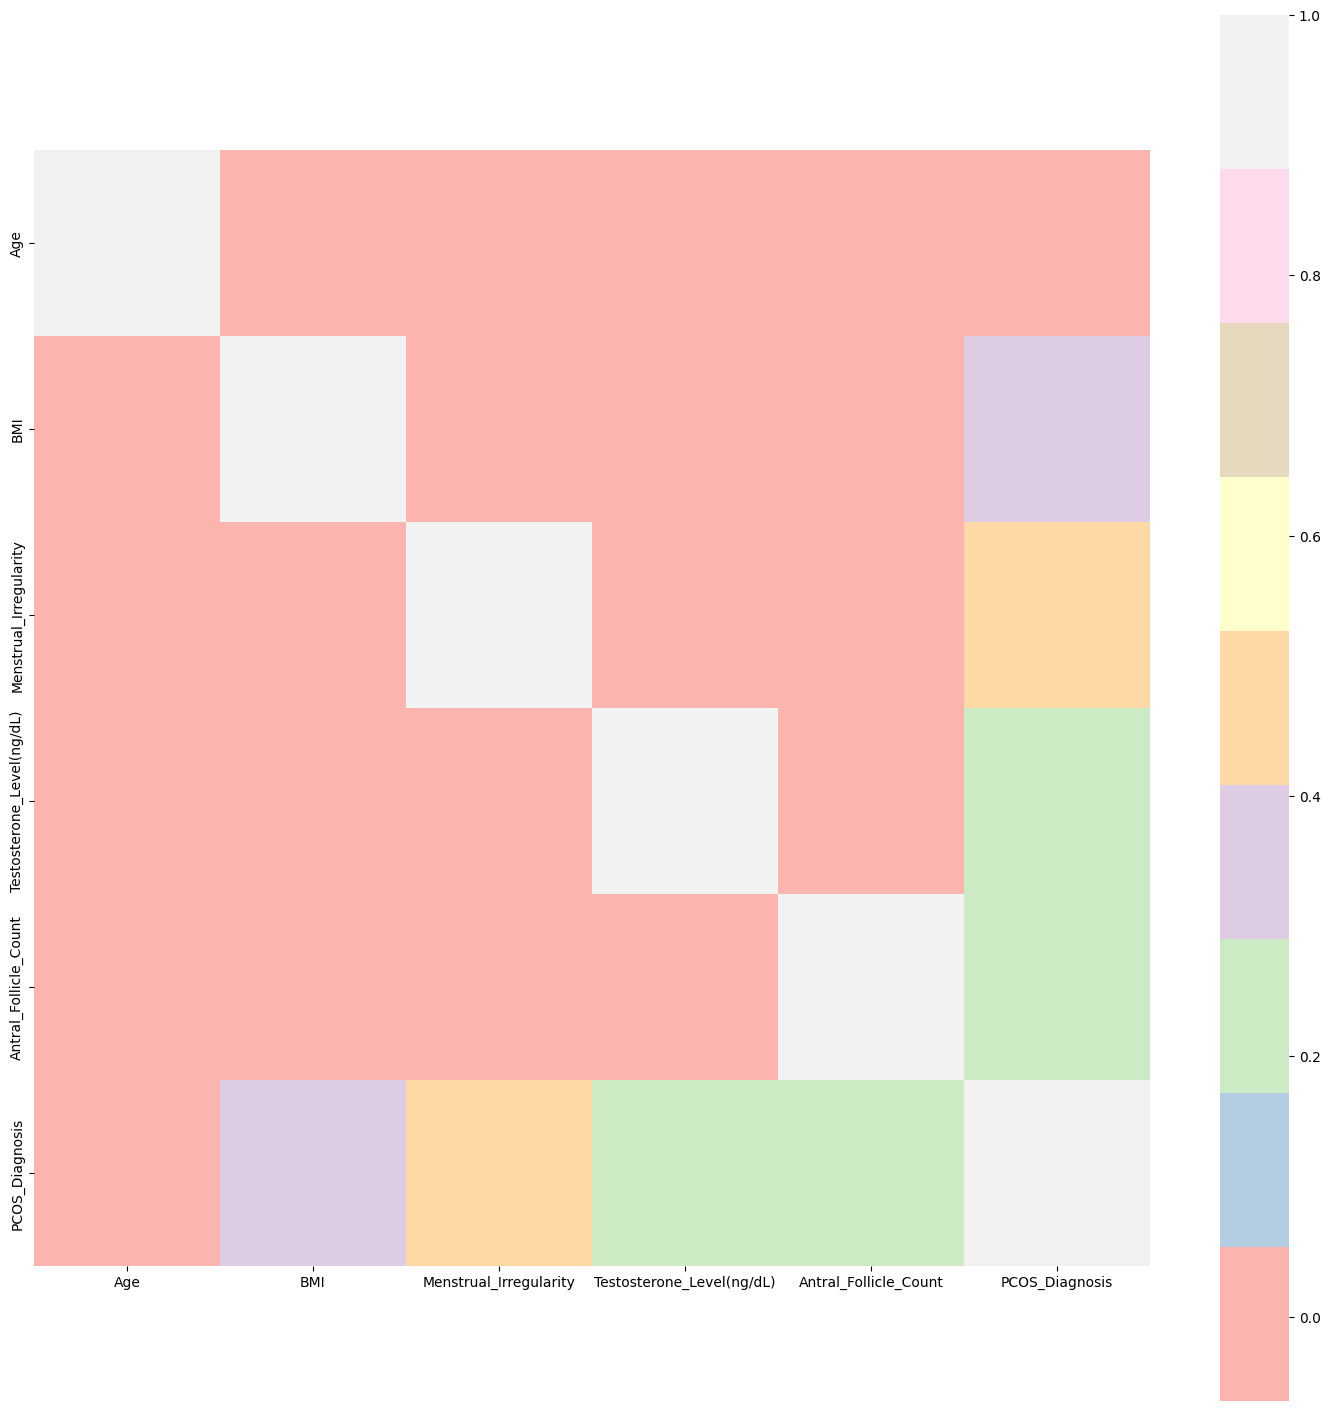

In [ ]:
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [ ]:
corrmat["PCOS_Diagnosis"].sort_values(ascending=False)

NameError: name 'corrmat' is not defined

Notes:

What is SVM:
An algorithm that separates data into classes linearly (hard/soft margin SVM) or non linearly (kernal). In 1D data (1 predictor), the separation is a point; in 2D it's a line; in 3D it's a plane. There are lots of ways to separate data, and SVM finds a solution that maximizes the margin (the distance between the two classes) of the line. Support factors are data points that are closest to the hyperplane. They are hard to classify, and are what determines the choice of the hyperplane.

During training, SVM predicts Y using this formula: X * Weights + Bias = Y. However, only the support vectors influence the weights and the hyperplane choice.

In [7]:
#splitting data

train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['PCOS_Diagnosis'])
trainX = train[['BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
trainY = train['PCOS_Diagnosis']

testX = test[['BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
testY = test['PCOS_Diagnosis']

In [8]:
#scaling data

scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

In [24]:
#testing with linear model

model = svm.SVC(kernel='linear', random_state=42)
model.fit(trainX_scaled, trainY)

predY = model.predict(testX_scaled)

accuracy = accuracy_score(testY, predY)
print(f"Model Accuracy:")
print(accuracy, "\n")

conf_matrix = confusion_matrix(testY, predY)
print("Confusion Matrix:")
print(conf_matrix, "\n")

class_report = classification_report(testY, predY)
print("\nClassification Report:")
print(class_report, "\n")

Model Accuracy:
0.92 

Confusion Matrix:
[[149  11]
 [  5  35]] 


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       160
           1       0.76      0.88      0.81        40

    accuracy                           0.92       200
   macro avg       0.86      0.90      0.88       200
weighted avg       0.93      0.92      0.92       200
 



Notes:

Observe how the result is the same as logistic regression. When using linear kernal and similar scaling/C/random state, the goal of logistic regression and SVM are the same--finding a hyperplane that separates classes.

In [41]:
#testing parameters:

model = svm.SVC(C=1.0, kernel='rbf', class_weight='balanced', decision_function_shape='ovr', random_state=42) #play around with it
model.fit(trainX_scaled, trainY)

predY = model.predict(testX_scaled)

accuracy = accuracy_score(testY, predY)
print(f"Model Accuracy:")
print(accuracy, "\n")

conf_matrix = confusion_matrix(testY, predY)
print("Confusion Matrix:")
print(conf_matrix, "\n")

class_report = classification_report(testY, predY)
print("\nClassification Report:")
print(class_report, "\n")

Model Accuracy:
0.965 

Confusion Matrix:
[[153   7]
 [  0  40]] 


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       160
           1       0.85      1.00      0.92        40

    accuracy                           0.96       200
   macro avg       0.93      0.98      0.95       200
weighted avg       0.97      0.96      0.97       200
 



In [ ]:
Notes:
model = SVC(
    C=1.0,                   # Regularization parameter: higher C smaller the margin, lower C more generalized
    kernel='rbf',            # Kernel: how data is transformed before classification: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
                                #'linear' = data is linearly separable
                                #'poly' = features interact with each other, separation is curved
                                #'rbf' = do not know data shape, capture complex data shape
                                #'sigmoid' = neural network like, not used anymore
                                #'precomputed' = data are similar on a special metrics (ie molecules, genomics data)

    degree=3,                # Only applicable for 'poly' kernel
    class_weight=None,       # adjusted for imbalanced class: 'balanced'
    decision_function_shape='ovr',  # 'ovo' (standard, multiclass) or 'ovr' (when classes overlaps)
    random_state=None        # Random seed for reproducibility
)